# Credit Card Fraud Detection


### Project Description:
* The aim of this project is to find out whether a particular credit card transaction is a fraud or not. These kinds of projects help us to find out the probability of the customers having a fraudulent transaction.
* The dataset keeps the privacy of a customer enrolled in their bank. The transaction details have been converted into some scaled reduced features to keep the integrity of the relationship between the client and the bank. 
* The dataset includes the following features:
    ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'].
* All the given features are continuous.
### Dataset link :- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Data Exploration

In [6]:
# check shape of dataset
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# check basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# check statistical description of dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# check any null values present in dataset or not
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Here we can see no null values present in dataset

# Exploratory Data Analysis (EDA)

### Data Visualization

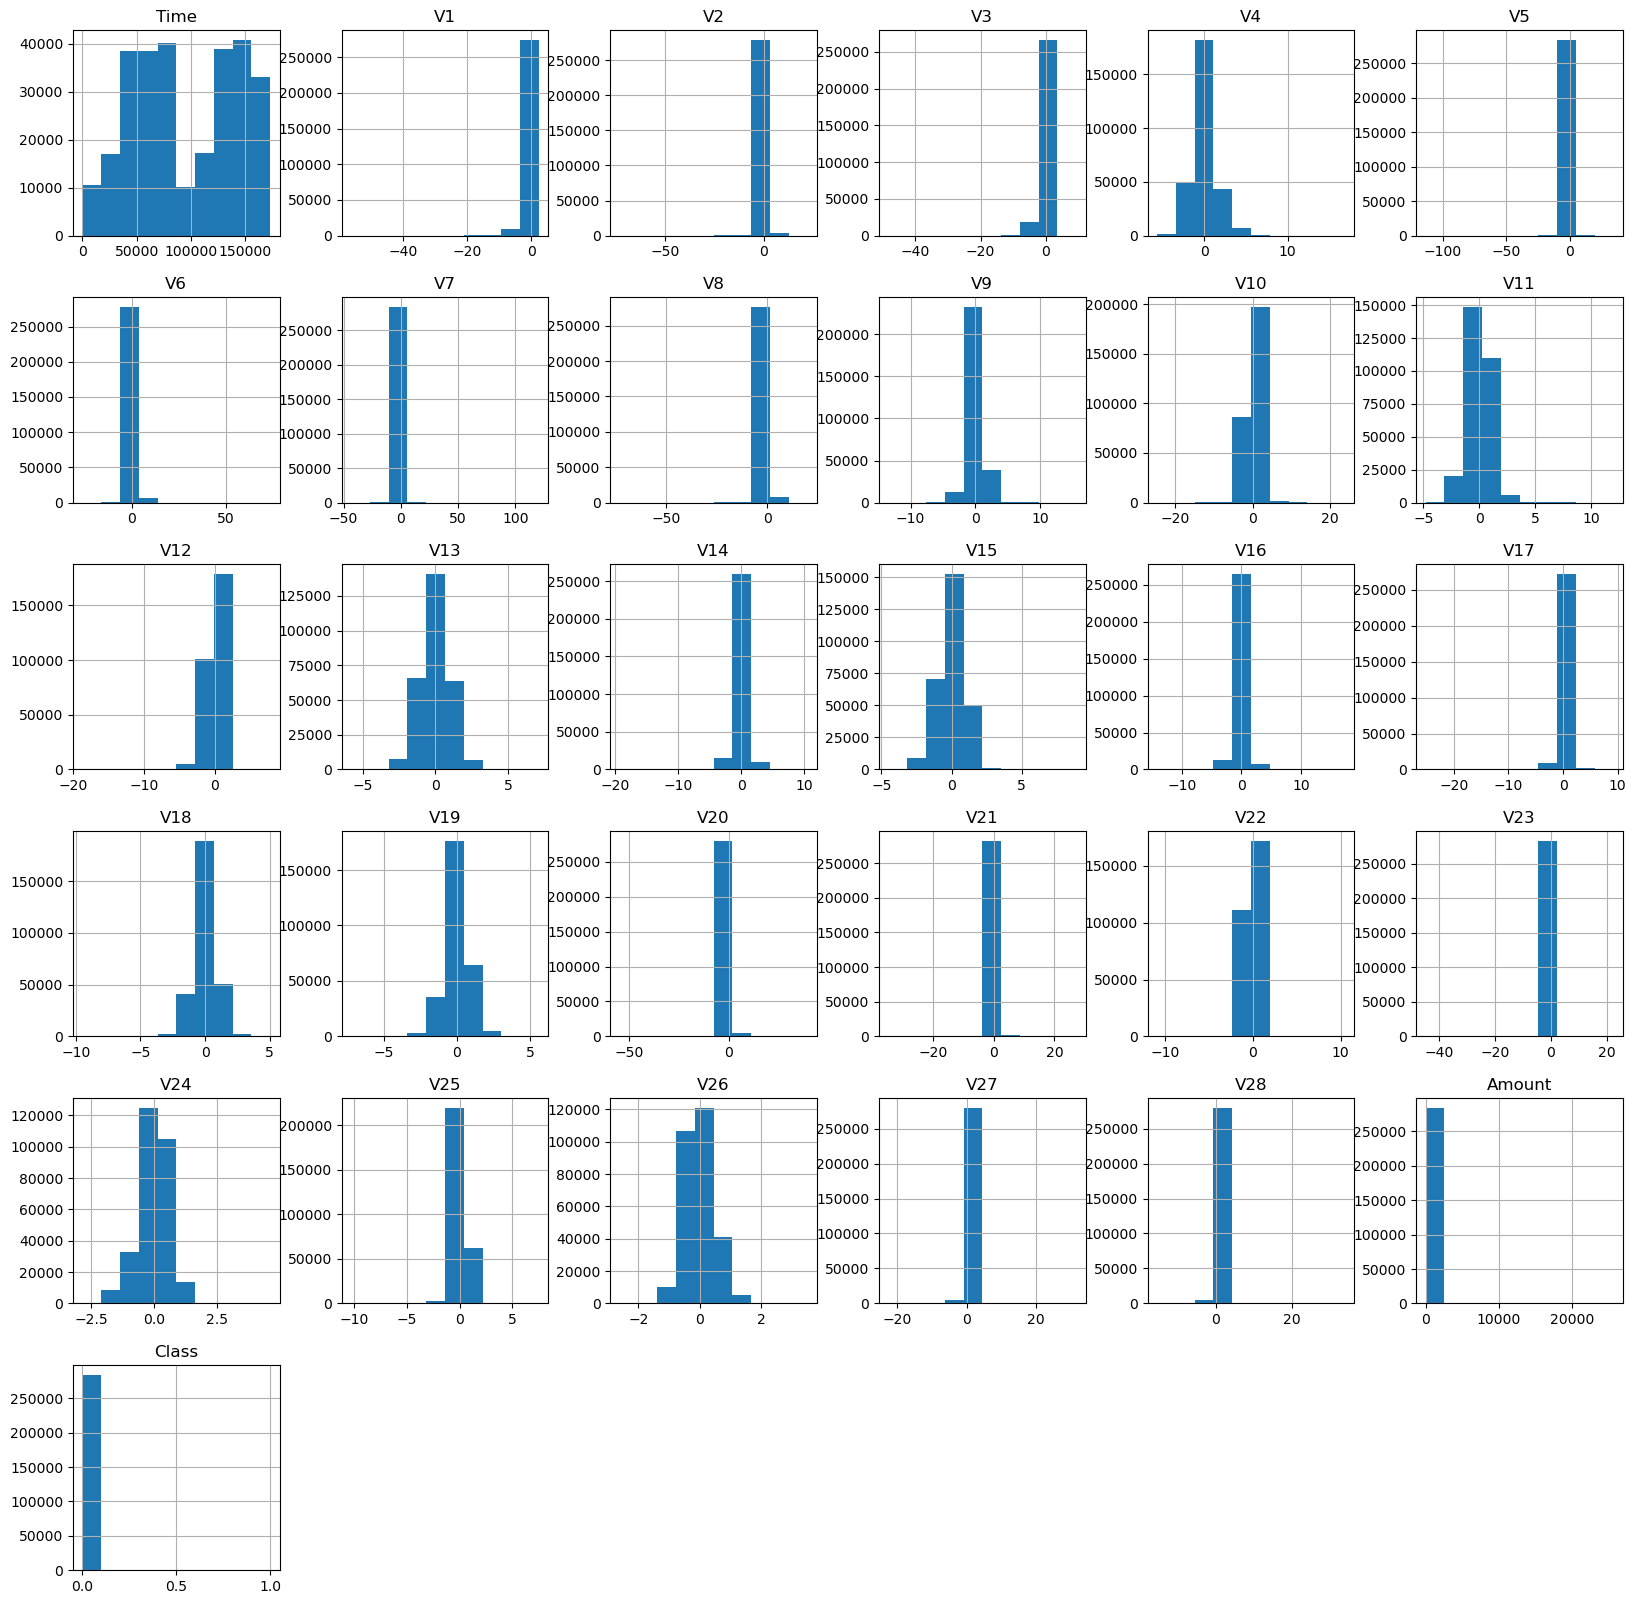

In [11]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

In [12]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

### What is relationship of fraud transactions with amount of money?

Let us try to determine the nature of transactions which are fraud and obtain a relevant set of the same with respect to their amount.

* We hypothesise based on our scatter plot that all fraud transactions occur for an amount less than 2500.

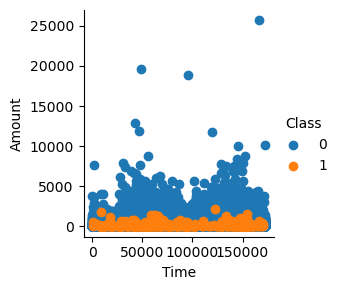

In [13]:
pairplot_data_grid(df, "Time", "Amount", "Class")

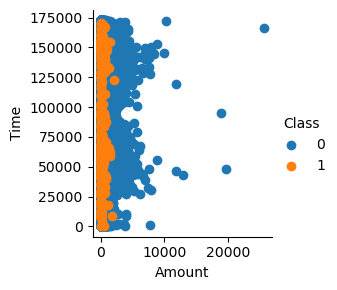

In [14]:
pairplot_data_grid(df, "Amount", "Time", "Class")

### What is the relationship between Time and Transactions?

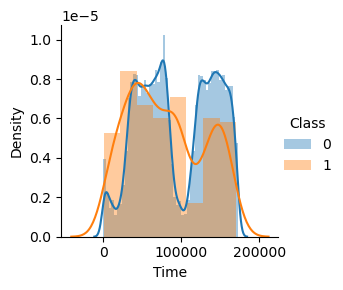

In [15]:
df_refine = df[["Time", "Amount", "Class"]]
sns.FacetGrid(df_refine, hue="Class").map(sns.distplot,"Time").add_legend()
plt.show()

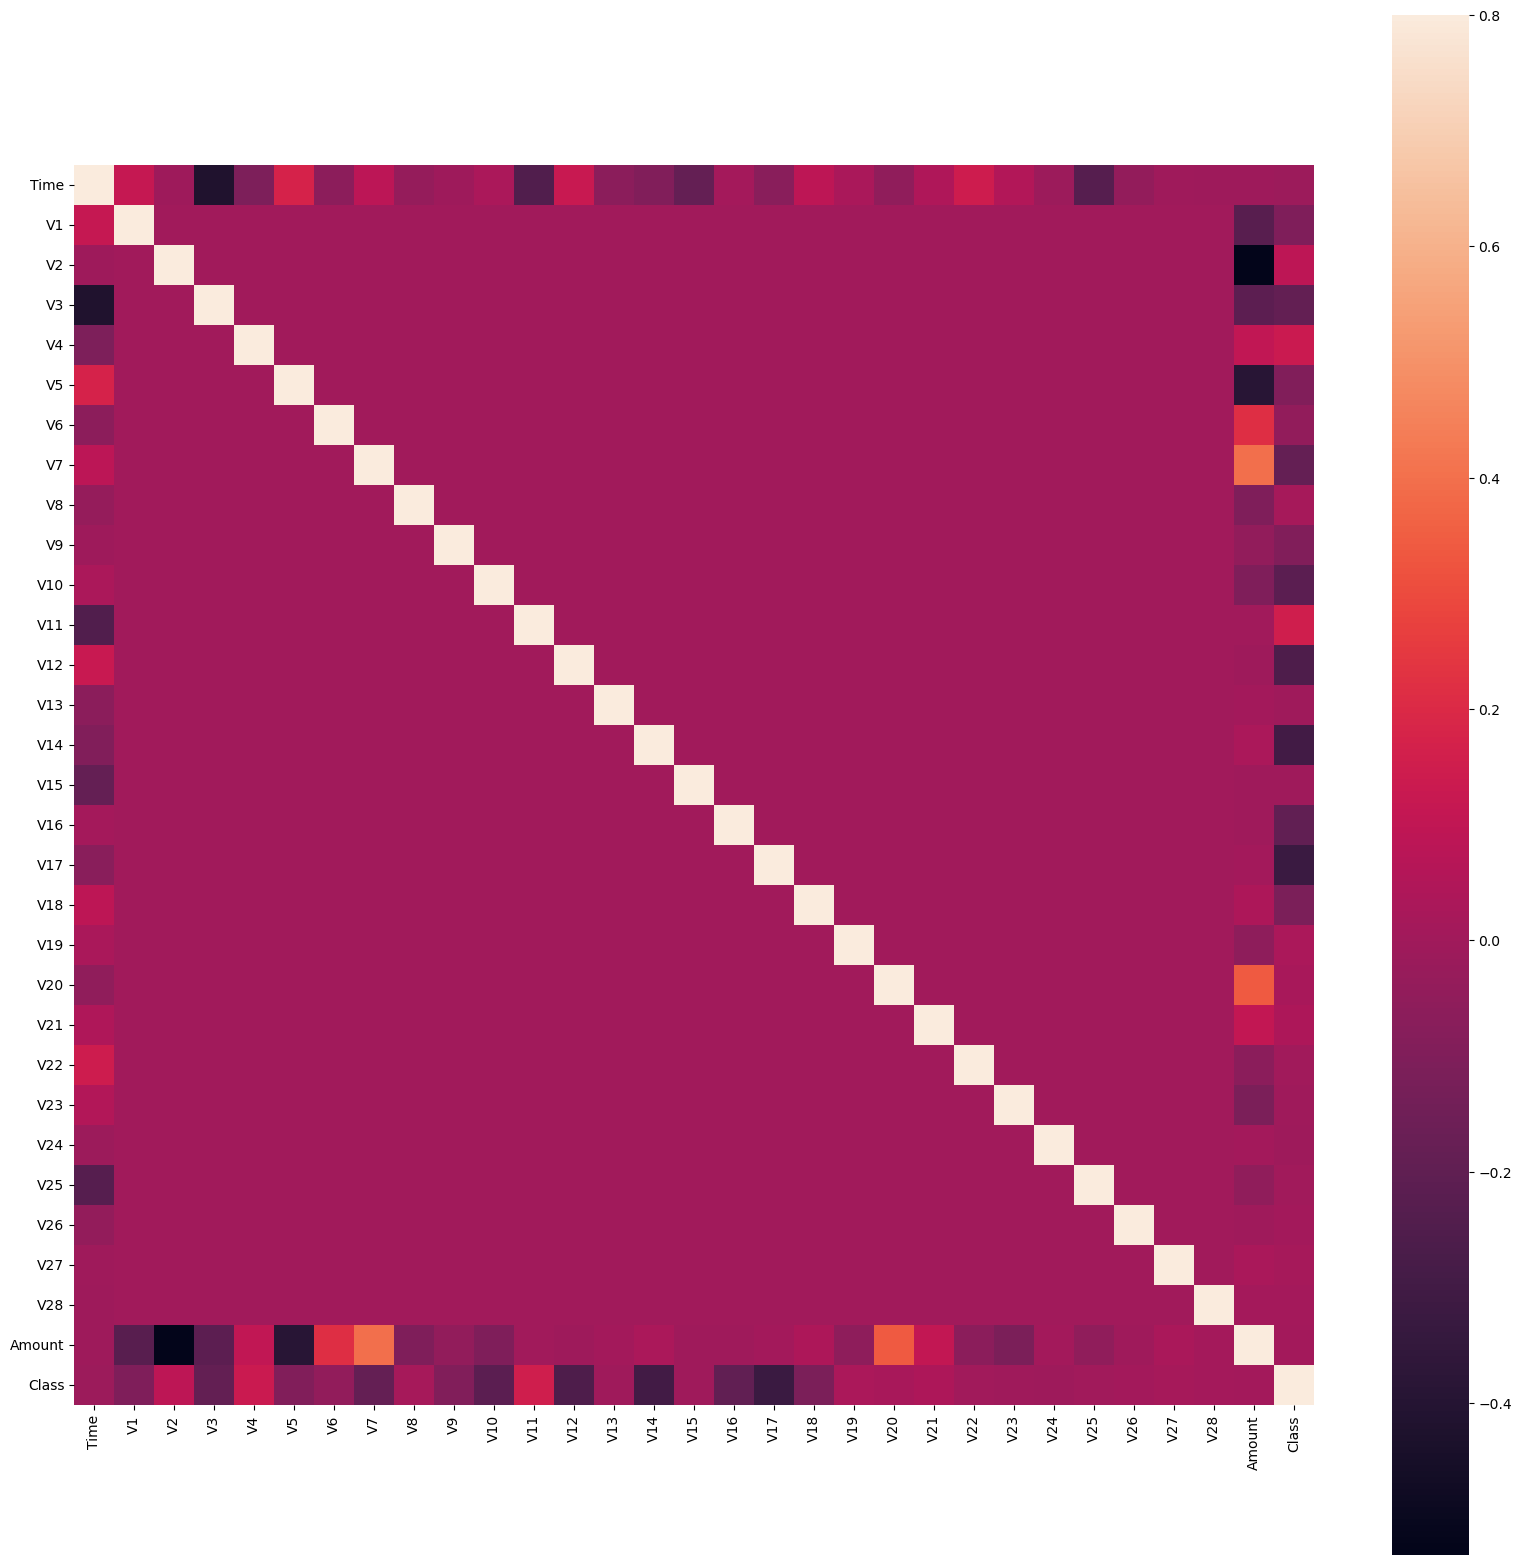

In [16]:
# Check correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),vmax = .8,square = True)
plt.show()

In the above HeatMap we can clearly see that most of the features do not correlate to other features but there are some features
that either has a positive or a negative correlation with each other. For example, `V2` and `V5` are highly negatively 
correlated with the feature called `Amount`. We also see some correlation with `V20` and `V7` with `Amount`.

* **Check Correlation of `Class` feature.**

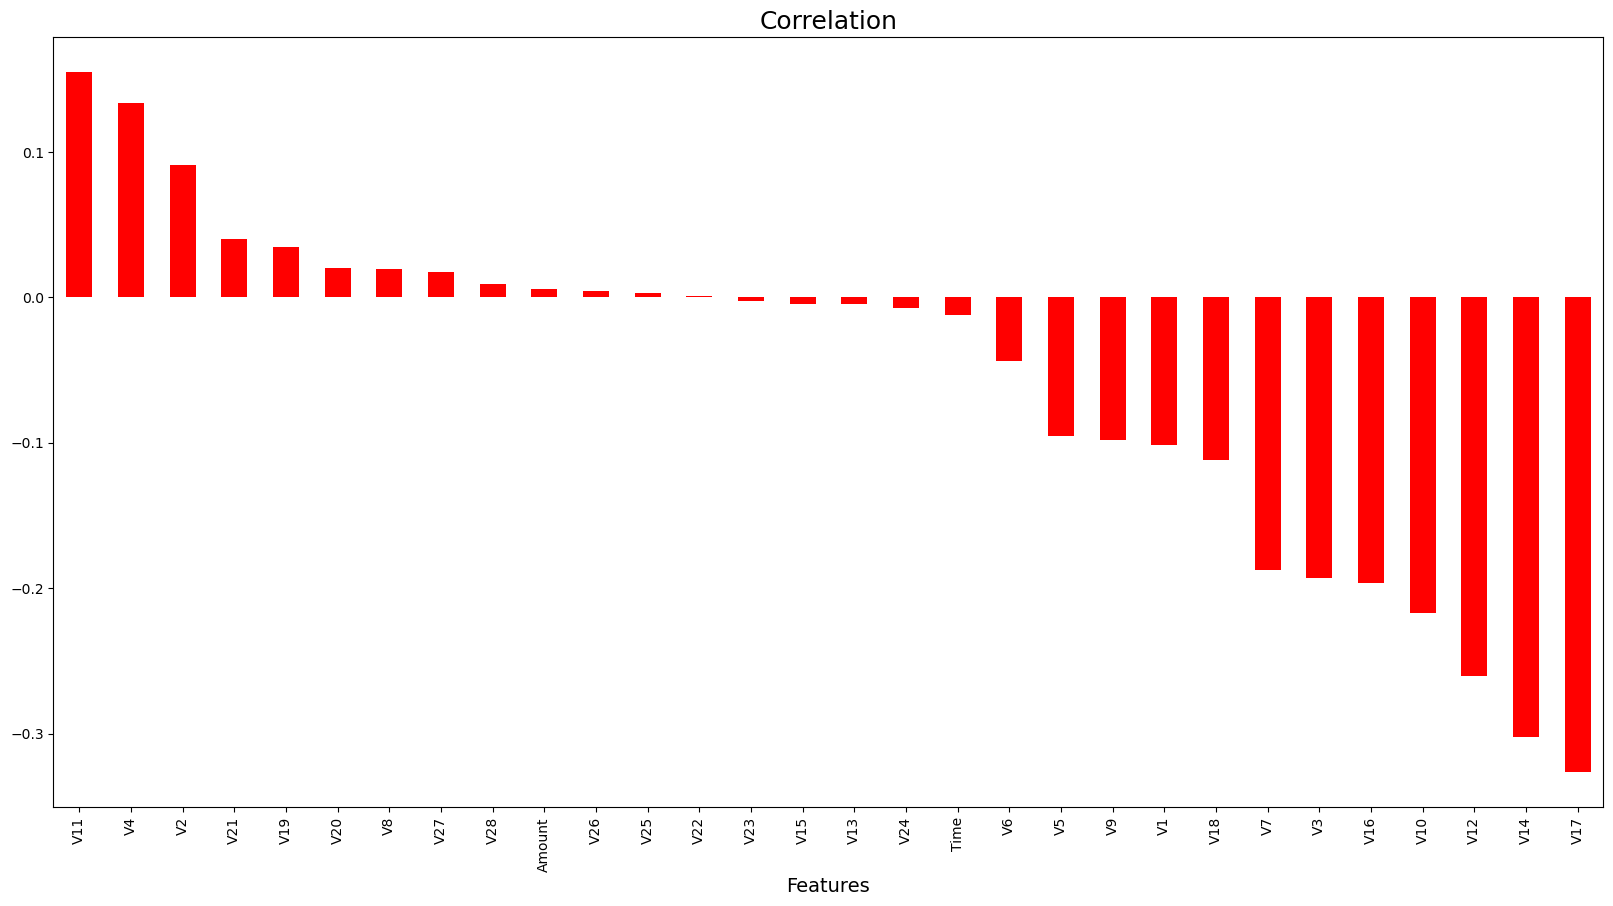

In [17]:
plt.figure(figsize = (20,10))
df.corr()['Class'].sort_values(ascending = False).drop(['Class']).plot(kind = 'bar',color = 'red')
plt.xlabel("Features",fontsize = 14)
plt.title("Correlation",fontsize = 18)
plt.show()

We can see here `V11` , `V4`, `V2` has positive correlation with `Class` and `V10`, `V12`, `V14` and `V17` has negetively 
correlated with `Class`.

* **Now Lets Check Distribution of `Class` feature.**

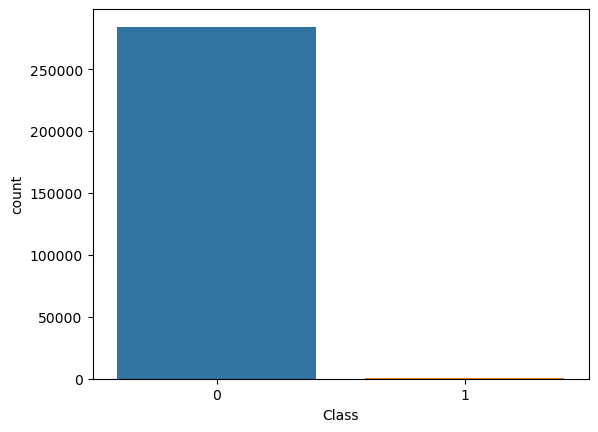

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


In [18]:
sns.countplot(x='Class', data = df)
plt.show()

#Classifying 0 as Not Fraud and 1 as Fraud
classes = {0: 'Not Fraud', 1: 'Fraud'}
print(df.Class.value_counts().rename(index = classes))

Above countplot shows Class data is highly imbalanced.

In [19]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [20]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [21]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds.


* Observe the distribution of classes with time

In [22]:
# Creating Fraudulent dataframe
data_fraud = df[df['Class'] == 1]

#Creating non Fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

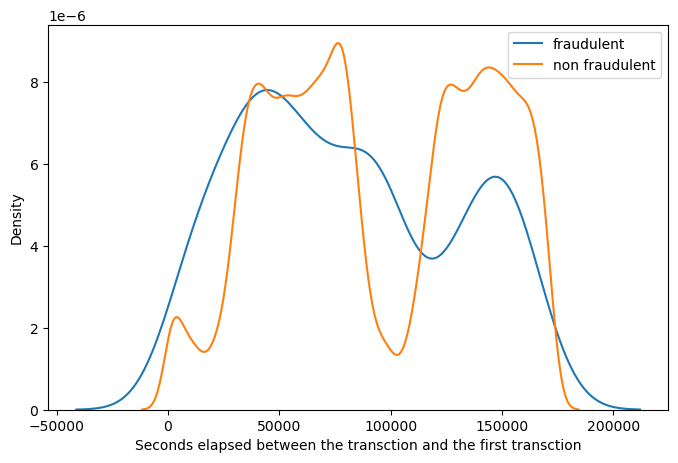

In [23]:
# Distribution plot
plt.figure(figsize=(8,5))

ax = sns.distplot(data_fraud['Time'],label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent', hist=False)

ax.set(xlabel='Seconds elapsed between the transction and the first transction')
ax.legend()

plt.show()

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to `Time`.

# Seperating the independent and dependent features

In [24]:
print('Data shape:', df.shape)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('X shape:',X.shape)
print('y shape:',y.shape)

Data shape: (284807, 31)
X shape: (284807, 30)
y shape: (284807,)


#  Implementing OverSampling method

In [25]:
from imblearn.over_sampling import RandomOverSampler

# Assuming you want to select 75% data
os = RandomOverSampler(sampling_strategy=0.75)  
X_res, y_res = os.fit_resample(X, y)
print(X_res.shape, y_res.shape)

(497551, 30) (497551,)


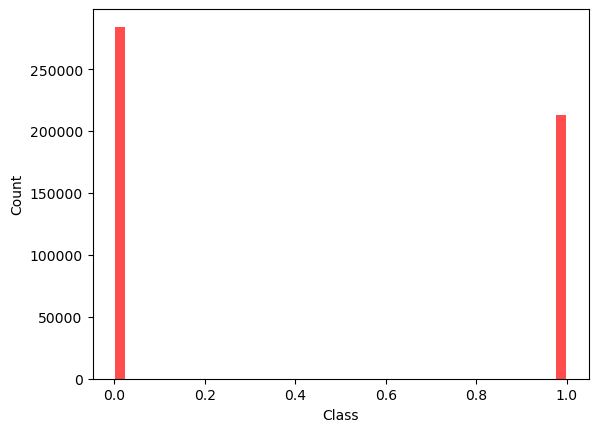

Class
0    284315
1    213236
Name: count, dtype: int64


In [26]:
# Assuming y_res is a pandas Series or NumPy array
plt.hist(y_res, bins='auto',color = 'red', alpha=0.7, rwidth=0.85)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Display value counts
print(y_res.value_counts())


# Model Building
### Splitting the dataset into training and testing

# Import Models 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2, random_state=0, shuffle=True)

#Train
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

#Test
print('X_test shape:',X_test.shape)
print('y_test:',y_test.shape)

X_train shape: (398040, 30)
y_train shape: (398040,)
X_test shape: (99511, 30)
y_test: (99511,)


### Logistic Regression

Logistic Regression Train Score:  94.29
Logistic Regression Test Score:  94.24


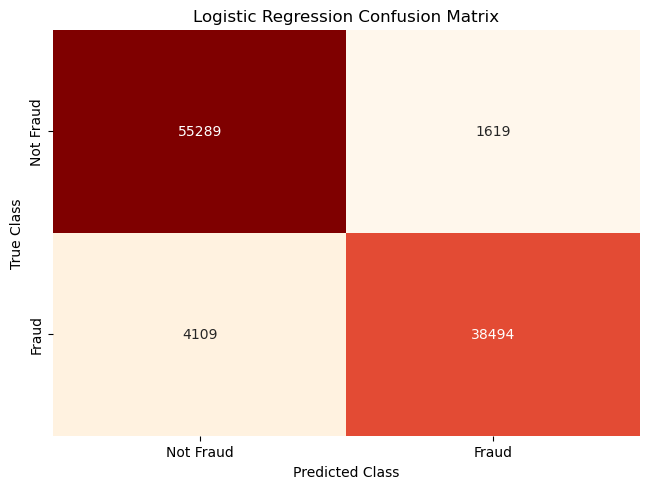

Classification Report:-
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56908
           1       0.96      0.90      0.93     42603

    accuracy                           0.94     99511
   macro avg       0.95      0.94      0.94     99511
weighted avg       0.94      0.94      0.94     99511



In [28]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)


#Score
lr_TrainScore =  round(lr.score(X_train, y_train) * 100, 2)
lr_TestScore = round(lr.score(X_test, y_test) * 100, 2)

print('Logistic Regression Train Score: ', lr_TrainScore)
print('Logistic Regression Test Score: ', lr_TestScore)


#Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
classes_names = ['Not Fraud', 'Fraud']
lr_ConfusionMatrix = pd.DataFrame(lr_cm, index=classes_names, columns=classes_names)

sns.heatmap(lr_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, lr_y_pred))

### Decision Tree

Decision Tree Train Score:  96.74
Decision Tree Test Score:  96.76


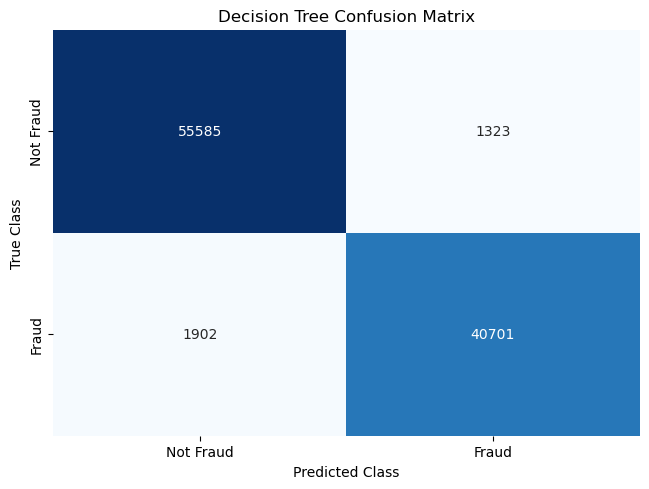

Classification Report:-
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56908
           1       0.97      0.96      0.96     42603

    accuracy                           0.97     99511
   macro avg       0.97      0.97      0.97     99511
weighted avg       0.97      0.97      0.97     99511



In [29]:
#Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) #criterion can be entropy
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)


#Score
dtree_TrainScore =  round(dtree.score(X_train, y_train) * 100, 2)
dtree_TestScore = round(dtree.score(X_test, y_test) * 100, 2)

print('Decision Tree Train Score: ' , dtree_TrainScore)
print('Decision Tree Test Score: ' , dtree_TestScore)


#Confusion Matrix
dtree_cm = confusion_matrix(y_test, dtree_y_pred)
dtree_ConfusionMatrix = pd.DataFrame(dtree_cm, index=classes_names, columns=classes_names)

sns.heatmap(dtree_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, dtree_y_pred))

### Random Forest

RandomForestModel Train Score:  95.87
RandomForestModel Test Score:  95.86


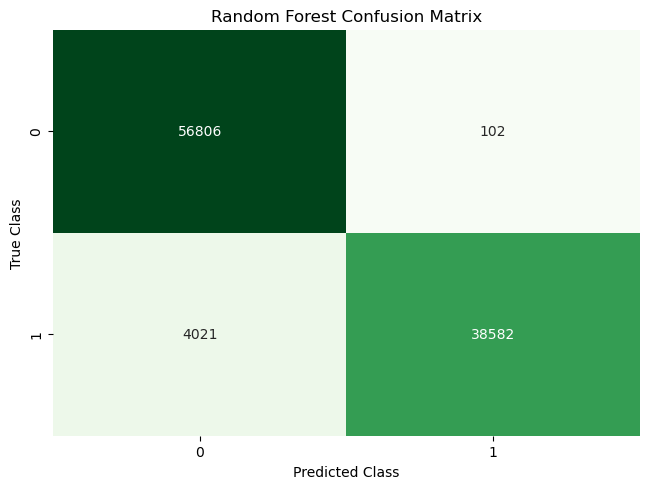

Classification Report:-
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     56908
           1       1.00      0.91      0.95     42603

    accuracy                           0.96     99511
   macro avg       0.97      0.95      0.96     99511
weighted avg       0.96      0.96      0.96     99511



In [30]:
#Random Forest Model
rfc = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)


#Score
rfc_TrainScore =  round(rfc.score(X_train, y_train) * 100, 2)
rfc_TestScore = round(rfc.score(X_test, y_test) * 100, 2)

print('RandomForestModel Train Score: ' , rfc_TrainScore)
print('RandomForestModel Test Score: ' , rfc_TestScore)


#Confusion Matrix
rfc_cm = confusion_matrix(y_test, rfc_y_pred)
rfc_ConfusionMatrix = pd.DataFrame(rfc_cm, index=classes_names, columns=classes_names)

sns.heatmap(rfc_cm, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, rfc_y_pred))

### Support Vector Classification

SVC Train Score:  67.06
SVC Test Score:  67.01


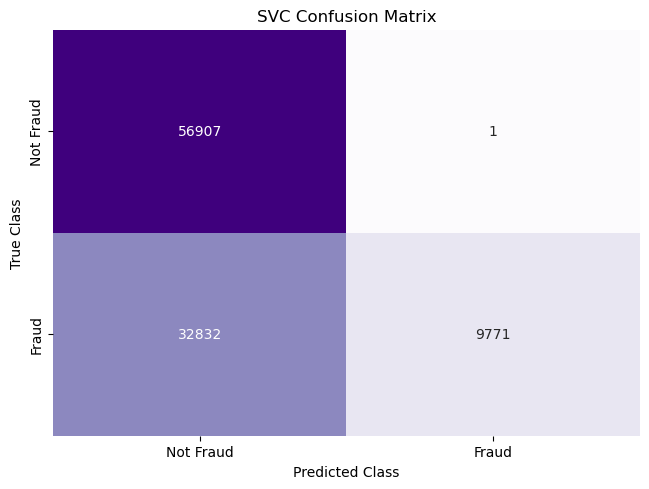

Classification Report:-
              precision    recall  f1-score   support

           0       0.63      1.00      0.78     56908
           1       1.00      0.23      0.37     42603

    accuracy                           0.67     99511
   macro avg       0.82      0.61      0.57     99511
weighted avg       0.79      0.67      0.60     99511



In [31]:
#SVC Model
svc = SVC(kernel= 'rbf', max_iter=100, C=1.0, gamma='auto')
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

#Score
svc_TrainScore =  round(svc.score(X_train, y_train) * 100, 2)
svc_TestScore = round(svc.score(X_test, y_test) * 100, 2)

print('SVC Train Score: ', svc_TrainScore)
print('SVC Test Score: ',svc_TestScore)


#Confusion Matrix
svc_cm = confusion_matrix(y_test, svc_y_pred)
svc_ConfusionMatrix = pd.DataFrame(svc_cm, index=classes_names, columns=classes_names)

sns.heatmap(svc_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("SVC Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, svc_y_pred))

### Ada Boost Classifier

Ada Boost Classifier Train Score:  96.46
Ada Boost Classifier Test Score:  96.45


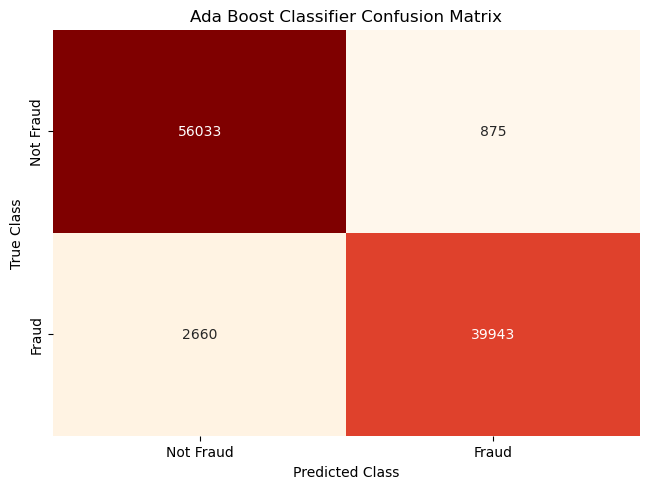

Classification Report:-
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56908
           1       0.98      0.94      0.96     42603

    accuracy                           0.96     99511
   macro avg       0.97      0.96      0.96     99511
weighted avg       0.96      0.96      0.96     99511



In [32]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb_y_pred = adb.predict(X_test)


#Score
adb_TrainScore =  round(adb.score(X_train, y_train) * 100, 2)
adb_TestScore = round(adb.score(X_test, y_test) * 100, 2)

print('Ada Boost Classifier Train Score: ', adb_TrainScore)
print('Ada Boost Classifier Test Score: ', adb_TestScore)


#Confusion Matrix
adb_cm = confusion_matrix(y_test, adb_y_pred)
classes_names = ['Not Fraud', 'Fraud']
adb_ConfusionMatrix = pd.DataFrame(adb_cm, index=classes_names, columns=classes_names)

sns.heatmap(adb_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Ada Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, adb_y_pred))



### Naive Bayes 

Naive Bayes Classifier Train Score:  87.57
Naive Bayes Classifier Test Score:  87.43


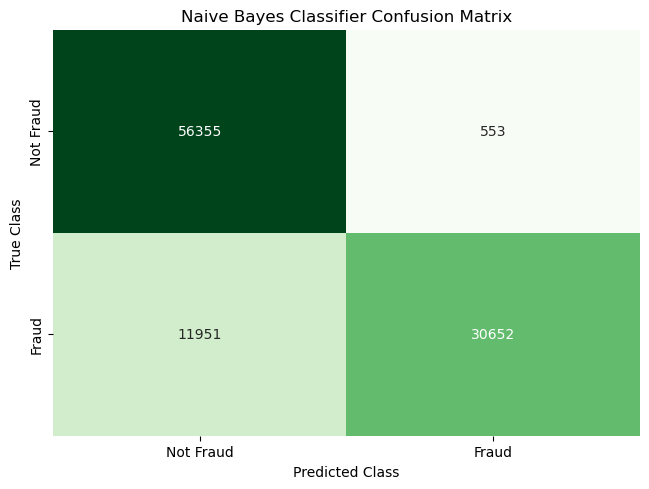

Classification Report:-
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     56908
           1       0.98      0.72      0.83     42603

    accuracy                           0.87     99511
   macro avg       0.90      0.85      0.87     99511
weighted avg       0.89      0.87      0.87     99511



In [33]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)


#Score
gnb_TrainScore =  round(gnb.score(X_train, y_train) * 100, 2)
gnb_TestScore = round(gnb.score(X_test, y_test) * 100, 2)

print('Naive Bayes Classifier Train Score: ', gnb_TrainScore)
print('Naive Bayes Classifier Test Score: ', gnb_TestScore)


#Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_y_pred)
classes_names = ['Not Fraud', 'Fraud']
gnb_ConfusionMatrix = pd.DataFrame(gnb_cm, index=classes_names, columns=classes_names)

sns.heatmap(gnb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Naive Bayes Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, gnb_y_pred))

### XG Boost Classifier

XG Boost Classifier Train Score:  99.99
XG Boost Classifier Test Score:  99.98


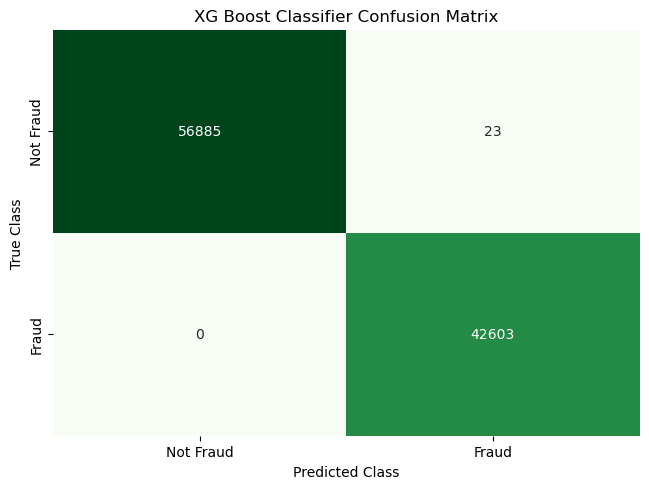

Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56908
           1       1.00      1.00      1.00     42603

    accuracy                           1.00     99511
   macro avg       1.00      1.00      1.00     99511
weighted avg       1.00      1.00      1.00     99511



In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)


#Score
xgb_TrainScore =  round(xgb.score(X_train, y_train) * 100, 2)
xgb_TestScore = round(xgb.score(X_test, y_test) * 100, 2)

print('XG Boost Classifier Train Score: ', xgb_TrainScore)
print('XG Boost Classifier Test Score: ', xgb_TestScore)


#Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
classes_names = ['Not Fraud', 'Fraud']
xgb_ConfusionMatrix = pd.DataFrame(xgb_cm, index=classes_names, columns=classes_names)

sns.heatmap(xgb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("XG Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, xgb_y_pred))



### Analysing different models

In [35]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Train Score': [lr_TrainScore, dtree_TrainScore, rfc_TrainScore, svc_TrainScore, adb_TrainScore, gnb_TrainScore, xgb_TrainScore],
    'Test Score': [lr_TestScore, dtree_TestScore, rfc_TestScore, svc_TestScore, adb_TestScore, gnb_TestScore, xgb_TestScore]})

models.sort_values(['Train Score', 'Test Score'], ascending=[False, False])

,Model,Train Score,Test Score
6,XG Boost Classifier,99.99,99.98
1,Decision Tree,96.74,96.76
4,Ada Boost Classifier,96.46,96.45
2,Random Forest,95.87,95.86
0,Logistic Regression,94.29,94.24
5,Naive Bayes,87.57,87.43
3,Support Vector Machines,67.06,67.01


### ROC curve 

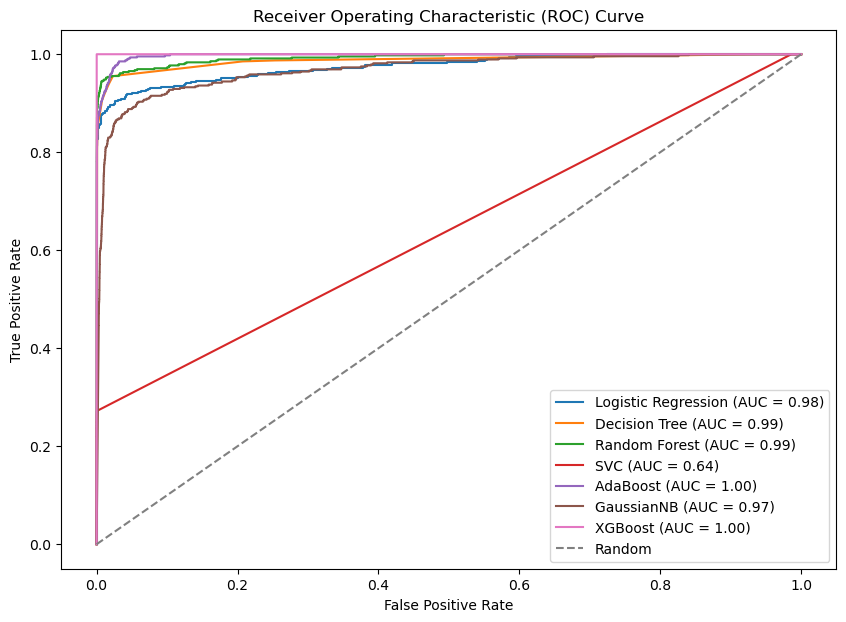

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifiers = [lr, dtree, rfc, svc, adb, gnb, xgb]
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'AdaBoost', 'GaussianNB', 'XGBoost']

plt.figure(figsize=(10, 7))

for clf, name in zip(classifiers, classifier_names):
    if hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

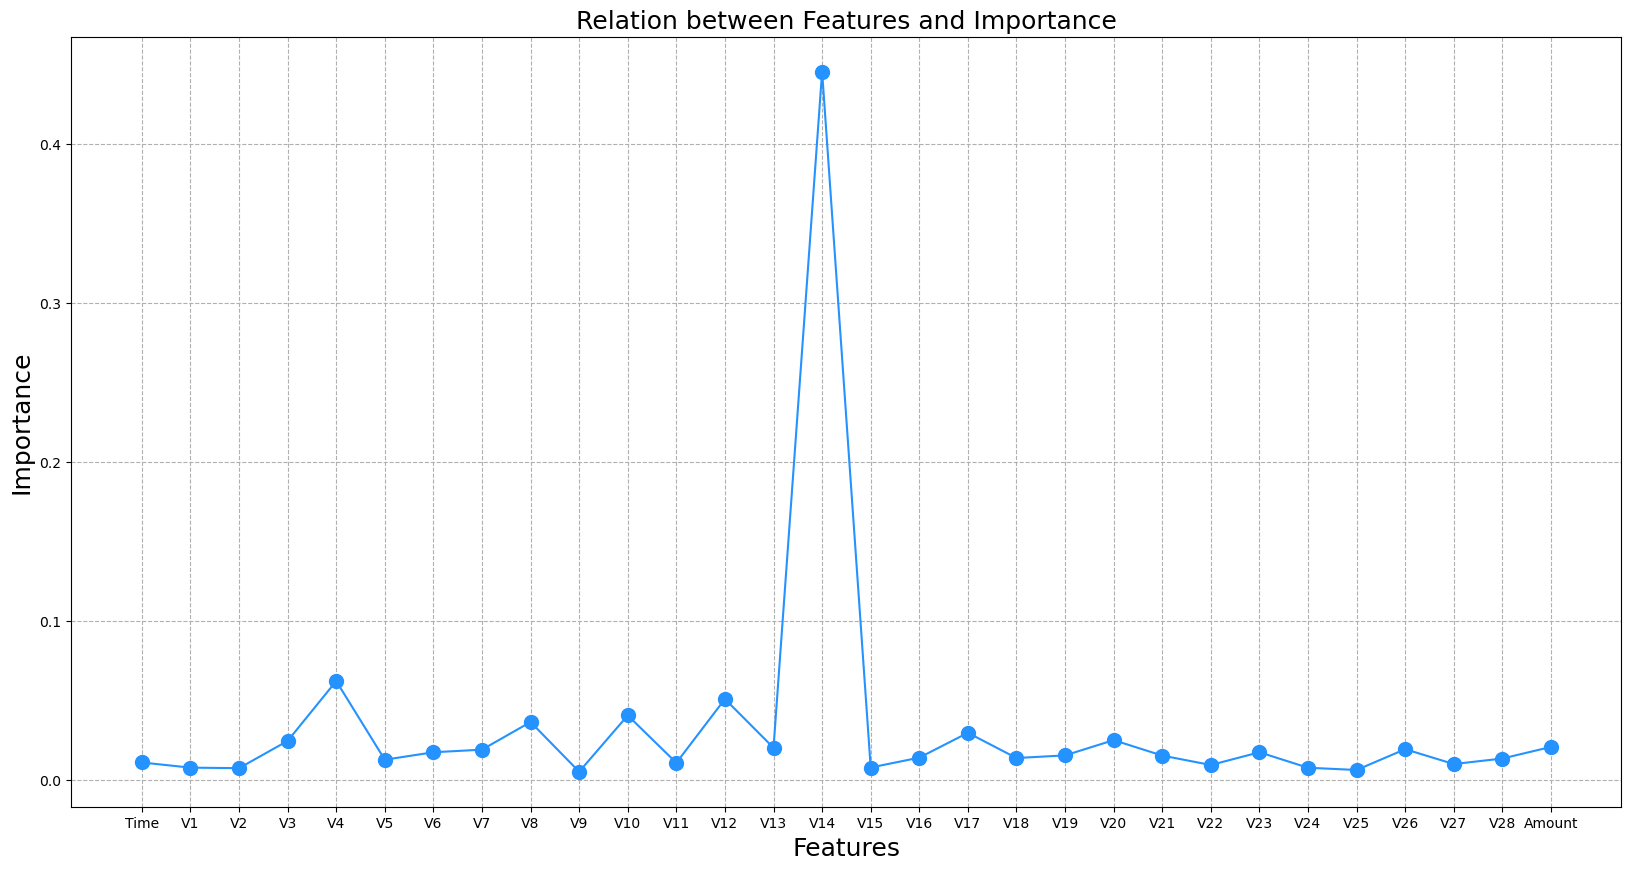

In [37]:
importance = xgb.feature_importances_

plt.figure(figsize=(20,10))
plt.ylabel('Importance', fontsize=18), plt.xlabel('Features', fontsize=18)
plt.title("Relation between Features and Importance", fontsize=18)
plt.plot(X.columns, importance, 'o-', color="#2492ff", markersize=10, label="Training score")
plt.grid(linestyle = '--', linewidth = 0.8)
plt.show()

### Conclusion
* We just received 99.99% accuracy in our credit card fraud detection.
* Accuracy of XG Boost Classifier model is 99.99 % and Support Vector Machine Classifier not performed well.

# Model Created Successfully !
### Thank You !

In [40]:
from ydata_profiling import ProfileReport

EDA_report = ProfileReport(df)
EDA_report.to_file(output_file='Credit Card Fraud Detection Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]